In [1]:
import pandas as pd
from helpers import *

def run_and_graph(tracking: str = 'balance', **kwargs):
    results = pd.DataFrame()

    for i in range(5000):
        game = init_game(**kwargs)
        sim(game)
        results = pd.concat((results, summarize(game, i)))
    
    outlier_threshold = results[tracking].mean() + results[tracking].std() * 2
    results = results[results[tracking] < outlier_threshold]
    binned = pd.cut(results.bets_made, bins=[0, 1] + list(range(5, 100, 5)))
    grouping = results.groupby(binned)
    grouping[tracking].median().plot(kind='bar', ylabel=tracking, yerr=1.385 * grouping[tracking].std())

## The current game

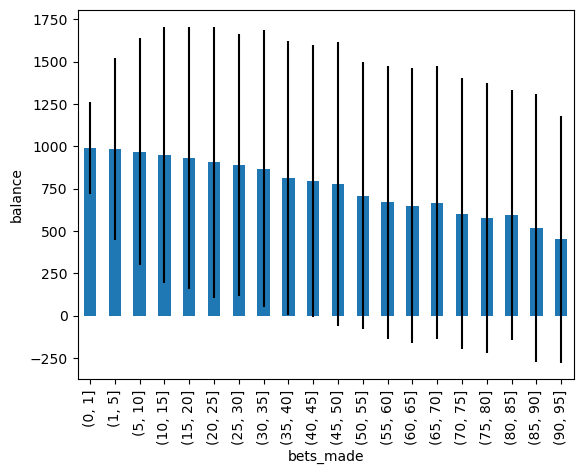

In [2]:
run_and_graph()

## With a $1 burn per offering not taken

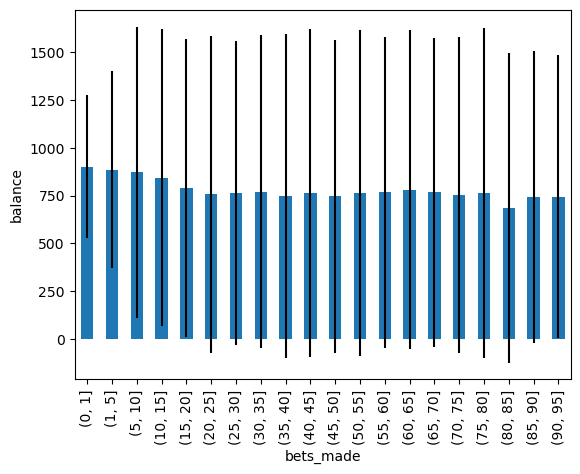

In [3]:
run_and_graph(burn=1)

## $5 burn

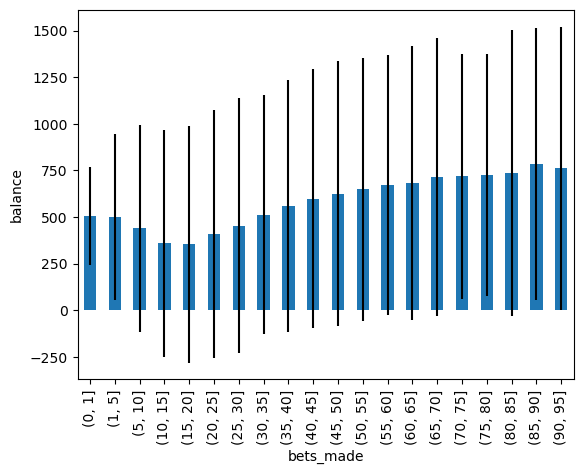

In [4]:
run_and_graph(burn=5)

## $10 burn

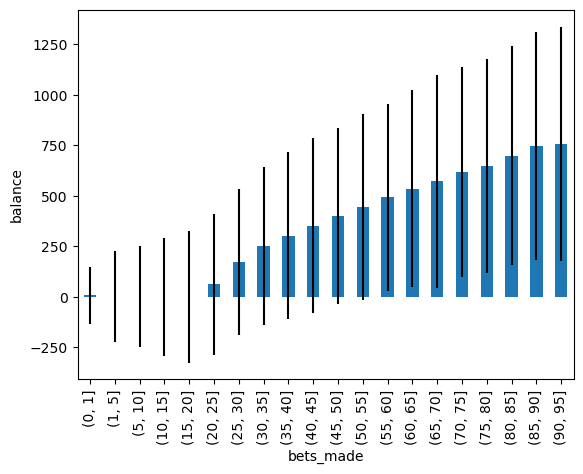

In [5]:
run_and_graph(burn=10)

## With a $100 minimum balance

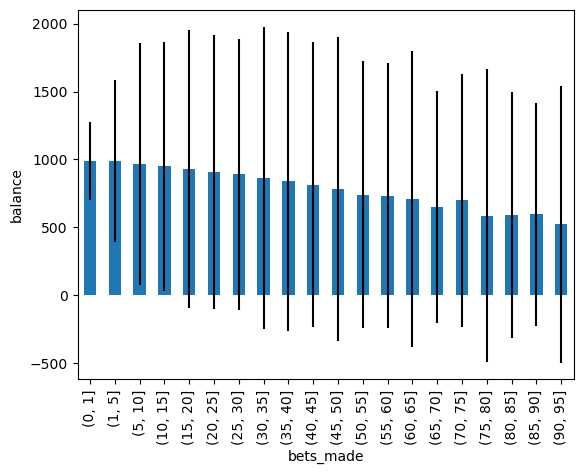

In [6]:
run_and_graph(minBalance=100)

## $500 minimum

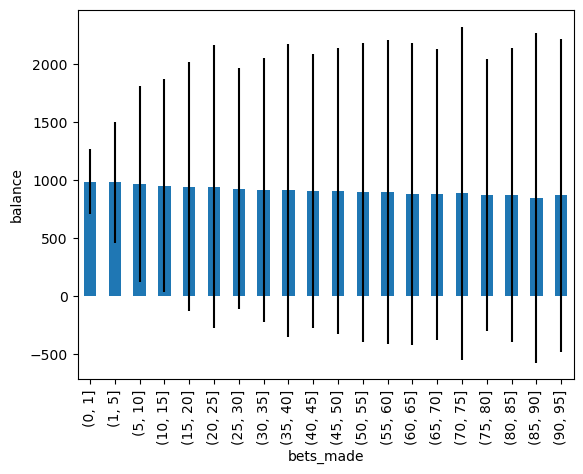

In [7]:
run_and_graph(minBalance=500)

## $900 minimum

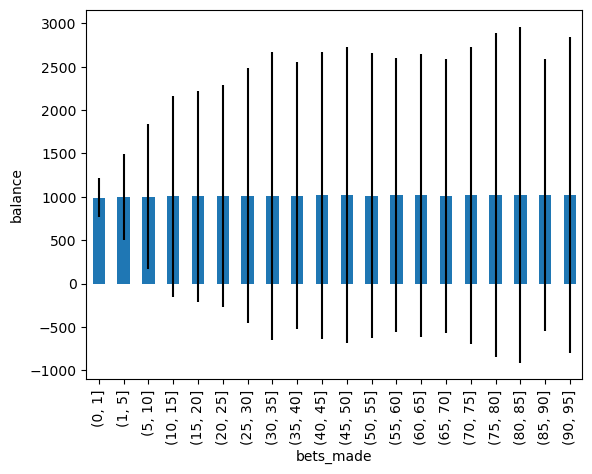

In [8]:
run_and_graph(minBalance=900)

## Throwing it all together...?

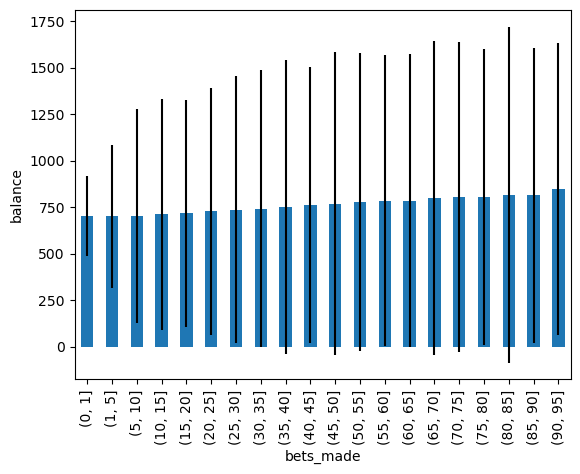

In [9]:
run_and_graph(minBalance=500, burn=3)

## Tracking revenue instead of balance

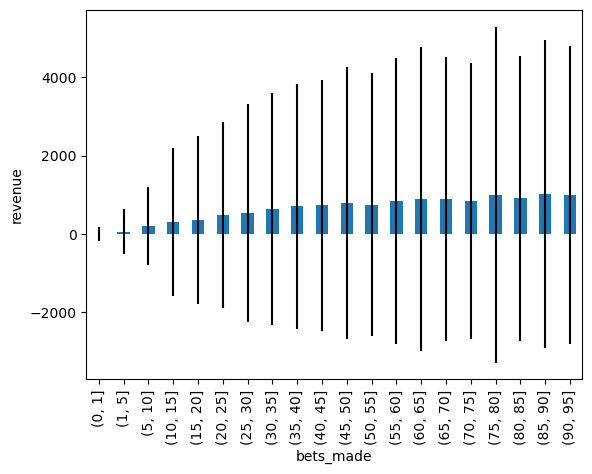

In [20]:
run_and_graph(tracking='revenue')

In [6]:
results = pd.concat([summarize(sim(init_game()), i) for i in range(10000)])

<AxesSubplot: xlabel='skill', ylabel='revenue'>

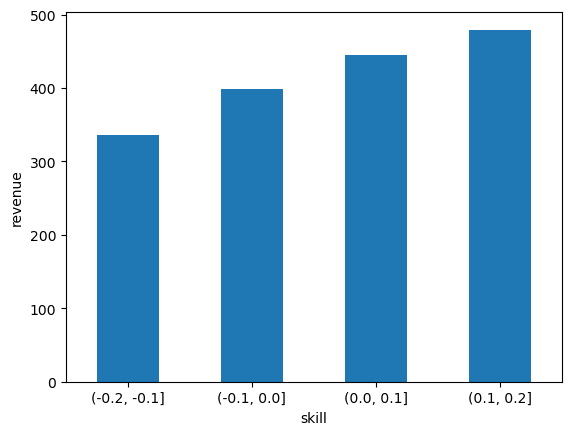

In [26]:
# outlier_threshold = results.revenue.mean() + results.revenue.std() * 3
# results = results[results.revenue < outlier_threshold]
binned = pd.cut(results.skill, bins=list(i / 100 for i in range(-20, 25, 10)))
grouping = results.groupby(binned)
# grouping.revenue.median().plot(kind='bar', ylabel='revenue', yerr=1.385 * grouping.revenue.std())
grouping.revenue.median().plot(kind='bar', ylabel='revenue', rot=0)

<AxesSubplot: xlabel='skill', ylabel='balance'>

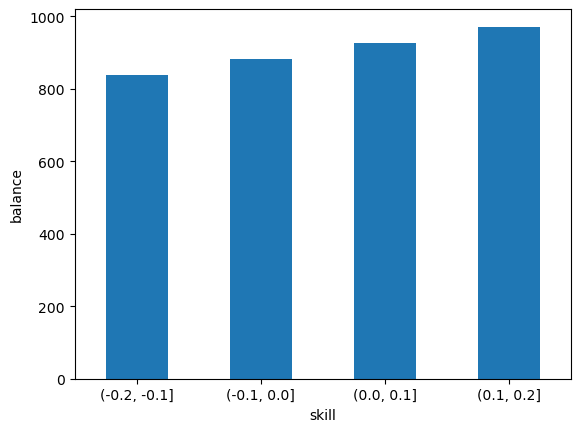

In [24]:
binned = pd.cut(results.skill, bins=list(i / 100 for i in range(-20, 25, 10)))
grouping = results.groupby(binned)
grouping.balance.median().plot(kind='bar', ylabel='balance', rot=0)